In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2

In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import sys
sys.path.insert(0, 'drive/Ashoka forms/')
#sys.path.insert(1, 'drive')
PATH = 'drive/Ashoka forms/'

In [3]:
!python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [4]:
import keras
import keras.backend as K
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout, AveragePooling2D, BatchNormalization
from keras.utils import np_utils 
from keras import regularizers
from sklearn.cross_validation import  train_test_split
from sklearn import metrics
import cv2
import os
import glob
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras.backend import tf as ktf
from time import time
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint

# https://keras.io/
!pip install -q keras


# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


labels =  pd.read_csv(PATH + 'Labels.csv') 

print(labels.columns)                                                     
d = {'M' : 0, 'B' : 1, 'N' : 2}
labels['diagnosis'] = labels['diagnosis'].map(d)

ROOT_DIR = 'drive/Ashoka forms/output1/'

# Put all images in the ROOT_DIR into the array named files

files = []
for file in glob.glob(ROOT_DIR + "*.pgm"):
    files.append(file)

# Create rows as many as we have at files array

row = len(files) * 3

width = 224
height = 224
num_class = 3
channel = 3
column = width * height * channel

X = []
y = []
index = 0

for file in files:
    if index % 100 == 0:
      print(index)
    img = cv2.imread(file)
    img = cv2.resize(img, (width, height))


    name = file.split('/')[-1]
    name = name.split('.')[0]
    
    
    X.append(img.ravel())
    y.append(labels[labels['Name']==name]['diagnosis'].values[0])
    
    
    index += 1

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Index(['Name', 'diagnosis'], dtype='object')
0
100
200
300


In [5]:
ROOT_DIR2 = 'drive/Ashoka forms/images-ia/'

files = []
for file in glob.glob(ROOT_DIR2 + "*.pgm"):
    files.append(file)

row = len(files) * 3

width = 224
height = 224
num_class = 3
channel = 3
column = width * height * channel

X2 = []
y2 = []
index = 0

for file in files:
    if index % 100 == 0:
      print(index)
    img = cv2.imread(file)
    img = cv2.resize(img, (width, height))

    name = file.split('/')[-1]
    name = name.split('.')[0]
    
    X2.append(img.ravel())
    y2.append(labels[labels['Name']+"_ia"==name]['diagnosis'].values[0])
    
    
    index += 1


0
100
200
300


In [6]:
ROOT_DIR3 = 'drive/Ashoka forms/images-ie/'

files = []
for file in glob.glob(ROOT_DIR3 + "*.pgm"):
    files.append(file)

# Create rows as many as we have at files array

row = len(files) * 3

width = 224
height = 224
num_class = 3
channel = 3
column = width * height * channel

X3 = []
y3 = []
index = 0

for file in files:
    if index % 100 == 0:
      print(index)
    img = cv2.imread(file)
    img = cv2.resize(img, (width, height))

    name = file.split('/')[-1]
    name = name.split('.')[0]
    
    X3.append(img.ravel())
    y3.append(labels[labels['Name']+"_ie"==name]['diagnosis'].values[0])
    
    
    index += 1

0
100
200
300


In [7]:
images_all= X+X2+X3

labels_all= y+y2+y3

images_all = np.array(images_all)
labels_all = np.array(labels_all)


print(images_all.shape)
print(labels_all.shape)
X = images_all
y = labels_all

(966, 150528)
(966,)


In [8]:
print('Main Feature Matrix', images_all.shape)

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=35, stratify=y)  # makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify

Main Feature Matrix (966, 150528)


In [9]:
#Random Over Sampling: Creates balanced samples by randomly increasing the number of minority examples

!pip install imblearn 
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=42)
X_res, y_res = rus.fit_sample(trainX, trainY)

In [0]:
trainX = X_res
trainY = y_res

In [0]:
trainX = trainX.reshape(trainX.shape[0], width, height, channel)
testX = testX.reshape(testX.shape[0], width, height, channel)

datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.3,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip= True,              
        fill_mode='nearest')

datagen.fit(trainX)

testgen = ImageDataGenerator(
        rescale=1./255)

testgen.fit(testX)

In [0]:
# Convert labels to categorical one-hot encoding
trainY = keras.utils.to_categorical(trainY, num_classes=num_class)
testY = keras.utils.to_categorical(testY, num_classes=num_class)

datagen = datagen.flow(trainX,trainY)
testgen = testgen.flow(testX,testY)

In [13]:
trainY.shape

(1497, 3)

In [14]:
input_shape = (width, height, channel)

input_shape

(224, 224, 3)

In [15]:
#STARTING TO BUILD NEURAL NETWORK
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class, kernel_regularizer=regularizers.l2(0.1), activation='softmax'))

model.summary()

#checkpoint = ModelCheckpoint('drive/breast_cancer_dl/our_best_model_3.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1),  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 128)       0         
__________

In [16]:
imsize=224
inputshape=(imsize,imsize,3)
inputshape

modelweight='imagenet'
from keras import applications
from keras.models import Model
from keras import optimizers

#TRANSFER LEARNING: is the method of using a pretrained repository, which is ImageNet here

model_transfer= applications.resnet50.ResNet50(weights=modelweight, include_top=False, input_shape=inputshape)
#model_transfer.summary()

for layer in model_transfer.layers:
  layer.trainable = False
  
x = model_transfer.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)

model_final = Model(input = model_transfer.input, output = predictions)


model_final.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.01), metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [0]:
history= model_final.fit_generator(datagen, steps_per_epoch=1497, epochs=200, validation_data=testgen)  
# The number of steps_per_epoch equals to trainY.shape to enable that the kernel can process all pixels in each one epoch

Epoch 1/200
1496/1497 [============================>.] - ETA: 0s - loss: 1.0635 - acc: 0.4339

1497/1497 [==============================] - 717s 479ms/step - loss: 1.0635 - acc: 0.4339 - val_loss: 1.0079 - val_acc: 0.6443
Epoch 2/200
 326/1497 [=====>........................] - ETA: 9:13 - loss: 0.9858 - acc: 0.5132

1497/1497 [==============================] - 712s 476ms/step - loss: 0.9551 - acc: 0.5371 - val_loss: 1.0538 - val_acc: 0.6443
Epoch 3/200
  12/1497 [..............................] - ETA: 8:47 - loss: 0.9061 - acc: 0.5775

1496/1497 [============================>.] - ETA: 0s - loss: 0.8916 - acc: 0.5850

1497/1497 [==============================] - 704s 470ms/step - loss: 0.8917 - acc: 0.5849 - val_loss: 1.0385 - val_acc: 0.6443
Epoch 4/200
 326/1497 [=====>........................] - ETA: 9:03 - loss: 0.8626 - acc: 0.6044

1497/1497 [==============================] - 702s 469ms/step - loss: 0.8444 - acc: 0.6153 - val_loss: 1.0593 - val_acc: 0.6443
Epoch 5/200
  12/1497 [..............................] - ETA: 8:49 - loss: 0.8167 - acc: 0.6667

1496/1497 [============================>.] - ETA: 0s - loss: 0.8002 - acc: 0.6411

1497/1497 [==============================] - 704s 470ms/step - loss: 0.8002 - acc: 0.6411 - val_loss: 1.0335 - val_acc: 0.6443
Epoch 6/200
 326/1497 [=====>........................] - ETA: 9:04 - loss: 0.7789 - acc: 0.6458

1497/1497 [==============================] - 703s 470ms/step - loss: 0.7634 - acc: 0.6598 - val_loss: 1.0453 - val_acc: 0.6443
Epoch 7/200
  12/1497 [..............................] - ETA: 8:20 - loss: 0.7485 - acc: 0.6536

1496/1497 [============================>.] - ETA: 0s - loss: 0.7272 - acc: 0.6813

1497/1497 [==============================] - 702s 469ms/step - loss: 0.7271 - acc: 0.6813 - val_loss: 1.0856 - val_acc: 0.6443
Epoch 8/200
 326/1497 [=====>........................] - ETA: 8:59 - loss: 0.7076 - acc: 0.6914

1497/1497 [==============================] - 707s 473ms/step - loss: 0.6960 - acc: 0.6948 - val_loss: 1.1249 - val_acc: 0.6443
Epoch 9/200
  12/1497 [..............................] - ETA: 8:44 - loss: 0.7101 - acc: 0.6914

1496/1497 [============================>.] - ETA: 0s - loss: 0.6689 - acc: 0.7121

1497/1497 [==============================] - 711s 475ms/step - loss: 0.6689 - acc: 0.7121 - val_loss: 1.2103 - val_acc: 0.6443
Epoch 10/200
 325/1497 [=====>........................] - ETA: 9:15 - loss: 0.6599 - acc: 0.7137

1497/1497 [==============================] - 714s 477ms/step - loss: 0.6452 - acc: 0.7256 - val_loss: 1.3092 - val_acc: 0.6443
Epoch 11/200
  11/1497 [..............................] - ETA: 8:42 - loss: 0.6481 - acc: 0.7301

1496/1497 [============================>.] - ETA: 0s - loss: 0.6146 - acc: 0.7398

1497/1497 [==============================] - 711s 475ms/step - loss: 0.6145 - acc: 0.7398 - val_loss: 1.3598 - val_acc: 0.6443
Epoch 12/200
 325/1497 [=====>........................] - ETA: 9:14 - loss: 0.5979 - acc: 0.7495

1497/1497 [==============================] - 721s 482ms/step - loss: 0.5913 - acc: 0.7541 - val_loss: 1.4368 - val_acc: 0.6443
Epoch 13/200
  11/1497 [..............................] - ETA: 9:03 - loss: 0.6544 - acc: 0.7443

1496/1497 [============================>.] - ETA: 0s - loss: 0.5792 - acc: 0.7577

1497/1497 [==============================] - 723s 483ms/step - loss: 0.5793 - acc: 0.7576 - val_loss: 1.6198 - val_acc: 0.6443
Epoch 14/200
 325/1497 [=====>........................] - ETA: 9:10 - loss: 0.5599 - acc: 0.7686

1497/1497 [==============================] - 711s 475ms/step - loss: 0.5530 - acc: 0.7705 - val_loss: 1.7070 - val_acc: 0.6443
Epoch 15/200
  11/1497 [..............................] - ETA: 9:53 - loss: 0.5953 - acc: 0.7500

1496/1497 [============================>.] - ETA: 0s - loss: 0.5384 - acc: 0.7790

1497/1497 [==============================] - 705s 471ms/step - loss: 0.5383 - acc: 0.7791 - val_loss: 1.9327 - val_acc: 0.6443
Epoch 16/200
 325/1497 [=====>........................] - ETA: 9:09 - loss: 0.5295 - acc: 0.7782

1497/1497 [==============================] - 708s 473ms/step - loss: 0.5244 - acc: 0.7838 - val_loss: 1.9774 - val_acc: 0.6443
Epoch 17/200
  11/1497 [..............................] - ETA: 8:21 - loss: 0.4768 - acc: 0.8418

 858/1497 [================>.............] - ETA: 5:04 - loss: 0.4973 - acc: 0.7947

In [56]:
#model.load_weights('drive/breast_cancer_dl/our_best_model_3.hdf5')
print(model.evaluate_generator(testgen))    #Test accuracy is low here hence we run 5 epochs before delivery to prove the generator works. 200 epochs' process takes a night. When we increase the number of epochs test accuracy directly increases to roundly 65%.
#model.save('drive/breast_cancer_dl/our_best_model_3.hdf5')

[1.7115210331592363, 0.30412371134020616]


In [0]:
history.history.keys()
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss'] 
val_acc = history.history['val_acc']

loss_dict = {'train_loss': train_loss, 'val_loss': val_loss}
acc_dict = {'train_acc': train_acc, 'val_acc': val_acc}

In [0]:

%matplotlib inline
loss_df = pd.DataFrame(loss_dict)
acc_df = pd.DataFrame(acc_dict)

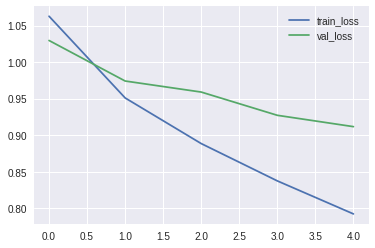

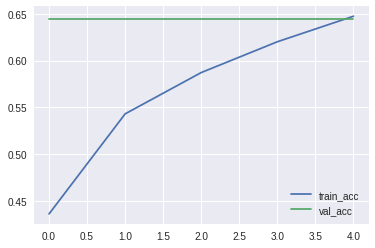

In [59]:
loss_df.plot()
acc_df.plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
Y_pred_prob = model.predict_generator(testgen)
print(Y_pred_prob)
Y_pred = np.argmax(Y_pred_prob,axis=1)
print(Y_pred)
print(len(Y_pred))

[[0.34151146 0.3355489  0.32293966]
 [0.33799222 0.32996964 0.33203816]
 [0.33664662 0.34153572 0.32181764]
 [0.34057966 0.3414034  0.3180169 ]
 [0.31875274 0.3408624  0.3403849 ]
 [0.32932746 0.3504192  0.32025334]
 [0.33852497 0.33420423 0.32727084]
 [0.3331588  0.34132797 0.32551327]
 [0.32585323 0.33797884 0.33616793]
 [0.3359683  0.33309597 0.33093572]
 [0.3238427  0.3478384  0.32831892]
 [0.32132295 0.33453473 0.34414232]
 [0.3241872  0.34210005 0.33371282]
 [0.32099092 0.3363131  0.34269595]
 [0.33699164 0.33712038 0.325888  ]
 [0.32412097 0.33612072 0.33975837]
 [0.3250842  0.34703496 0.32788086]
 [0.3364187  0.33532122 0.32826015]
 [0.33951384 0.3356097  0.32487646]
 [0.32171664 0.3504958  0.32778758]
 [0.31489858 0.3419134  0.34318808]
 [0.32477978 0.33573192 0.33948833]
 [0.33326218 0.33591276 0.33082503]
 [0.31653243 0.34678978 0.3366778 ]
 [0.3118832  0.3422499  0.34586686]
 [0.33707777 0.3336367  0.3292855 ]
 [0.3195352  0.3419159  0.33854893]
 [0.32798114 0.34016526 0.33

In [62]:
target_names = ['class 0(MALIGN)', 'class 1(BENIGN)', 'class 2(NORMAL)']
Y_true= np.argmax(testY,axis=1)
print(Y_true)
print(len(Y_true))

[2 1 2 2 2 0 1 1 2 2 2 2 2 2 2 0 2 2 1 1 0 1 2 2 2 1 1 1 1 1 2 2 2 1 2 2 0
 2 0 2 1 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 0 2 2 0
 2 2 2 0 2 0 1 2 1 1 2 0 2 2 2 2 2 1 2 1 2 2 2 2 0 2 2 1 2 2 0 2 2 2 2 2 2
 2 2 1 2 0 1 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 0 2 2 2 1 1 2 2 0 1 2 2 2 2
 2 2 2 2 2 0 1 2 2 2 2 1 1 1 2 2 0 2 2 0 2 0 1 0 0 0 0 2 1 2 2 2 0 1 2 2 2
 2 2 0 0 1 2 2 2 0]
194


In [63]:
print(confusion_matrix(Y_true, Y_pred))

[[ 2 25  4]
 [ 8 17 13]
 [10 88 27]]


In [64]:
print(classification_report(Y_true, Y_pred ,target_names=target_names))

                 precision    recall  f1-score   support

class 0(MALIGN)       0.10      0.06      0.08        31
class 1(BENIGN)       0.13      0.45      0.20        38
class 2(NORMAL)       0.61      0.22      0.32       125

    avg / total       0.44      0.24      0.26       194

